# Servo Prediction Using Linear Regression

# Objective

The objective of servo prediction using linear regression is to create a model that can predict the output of a servo system (such as position, speed, or torque) based on one or more input variables using linear relationships.

# data sources
1.Sensor Data: Position, velocity, and current/voltage sensors measuring servo behavior.
2.Control Signals: PWM data or command inputs controlling the servo.
3.Servo Specifications: Manufacturer data sheets and performance info.
4.Experimental Data: Data collected from real-world servo tests or test benches.
5.Simulated Data: Data generated using simulation software (e.g., MATLAB, Simulink).
6.Public Datasets: Datasets from robotics, automation, or control systems research.
7.Open-Source Platforms: Data from projects like Arduino, ROS, or other robotics systems.


# import libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

 # Import CSV as DataFrame

In [3]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

# get the first Five Rows of DataFrame

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# get information of DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# get the Summary Statictics

In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# Get Columns Names

In [7]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Get Shape of DataFrame

In [8]:
df.shape

(167, 5)

# Get Categories and Counts of Categorical Variables

In [9]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [10]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


# Get Encoding of Categorical Features

In [13]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

<ipython-input-13-8dcba8d8e366>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


In [15]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

<ipython-input-15-a5b050a7091b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)


#define y(dependent or label or target variable)and x(independent or features or attribute variable)

In [16]:
y=df['Class']

In [17]:
y.shape

(167,)

In [18]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [19]:
x=df[['Motor','Screw','Pgain','Vgain']]

In [20]:
x=df.drop('Class',axis=1)

In [21]:
x.shape

(167, 4)

In [22]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Get Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2529)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((116, 4), (51, 4), (116,), (51,))

#Get Model Train

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

# Get Model Prediction

In [29]:
y_pred=lr.predict(x_test)

In [30]:
y_pred.shape

(51,)

In [31]:
y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

# Get Model Evaluation

In [32]:
from  sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
mean_squared_error(y_test,y_pred)

66.03589175595563

In [34]:
mean_absolute_error(y_test,y_pred)

7.190539677251235

In [35]:
r2_score(y_test,y_pred)

0.6807245170563927

# Get Visualization of Actual Vs Predicted Results

<function matplotlib.pyplot.show(close=None, block=None)>

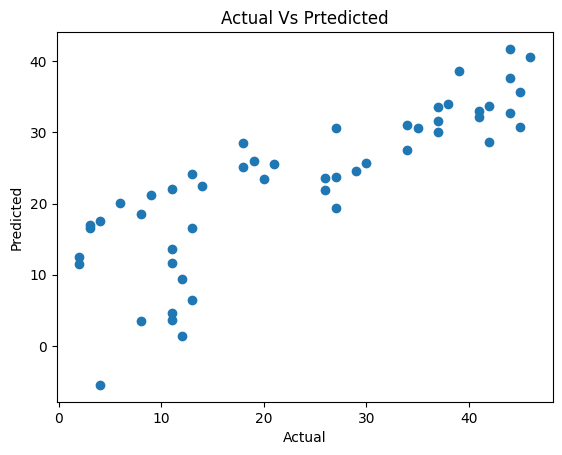

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Prtedicted")
plt.show

# Get Future Prediction

### lets select a random sample from existing dataset as new value
step to follow
1.Extract a random row using sample  function
2.Separate X and Y
3.Standardize X
4.Predict

In [37]:
x_new=df.sample(1)

In [38]:
x_new

,Motor,Screw,Pgain,Vgain,Class
6,2,0,3,2,46


In [39]:
x_new.shape

(1, 5)

In [41]:
x_new=x_new.drop('Class',axis=1)

In [42]:
x_new

,Motor,Screw,Pgain,Vgain
6,2,0,3,2


In [43]:
x_new.shape

(1, 4)

In [44]:
y_pred_new=lr.predict(x_new)

In [45]:
y_pred_new

array([40.60404401])